In [37]:
cd /Users/amandaash/Desktop/Research/scripts/

/Users/amandaash/Desktop/Research/scripts


In [38]:
from __future__ import print_function, division, absolute_import

import os

%matplotlib inline
import matplotlib
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np
from astropy.coordinates import SkyCoord
from astropy.time import Time
import astropy.io.ascii as at
import astropy.io.fits as fits
import astropy.units as u
from scipy.interpolate import interp1d
from cycler import cycler

In [39]:
from k2_class_master import kep_io

In [40]:
%matplotlib inline

In [41]:
hdul = fits.open('/Users/amandaash/Desktop/Research/data/K2C16_Amanda/EPIC_211822797_mastC16.fits')
#list(hdul[1].data['quality'])

[2458095.46775264 2458095.48818801 2458095.50862347 ... 2458174.98206182
 2458175.0024967  2458175.02293149]


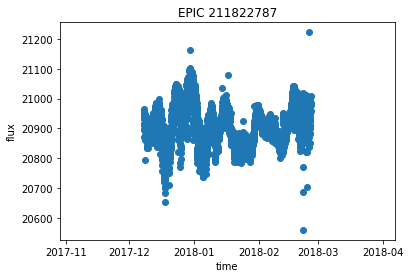

In [42]:
light_curve1 = kep_io.k2sff_io('/Users/amandaash/Desktop/Research/data/K2C16_Amanda/EPIC_211822797_mastC16.fits')

time = light_curve1[0]
flux = light_curve1[1]

time_UTC = Time(time, format='jd', scale='utc').datetime
print(time)
#print(list(time_UTC))


plt.scatter(time_UTC,flux)
plt.xlabel('time')
plt.ylabel('flux')
plt.title('EPIC 211822787')
plt.show()

In [43]:
obs_tab =[]
import csv

with open('/Users/amandaash/Desktop/Research/observation_info/observation_table.csv', 'r') as csvFile:
    obs_data = csv.reader(csvFile)
    for row in obs_data:
        obs_tab.append(row)
csvFile.close()


ID = []

for n in obs_tab[1:]:
    ID.append(n[0:2])

target_ID = np.unique(np.array(ID),axis = 0)

import glob

files = glob.glob('/Users/amandaash/Desktop/Research/data/K2C16_Amanda/*.fits')
EPIC_ID = []
for file in files:
    ID = (file.split('/')[7]).split('_')[1]
    EPIC_ID.append(ID)


for target in target_ID:
    EPIC = target[1]
    if EPIC in EPIC_ID:
        index = EPIC_ID.index(EPIC)
        light_curve = files[index]
        time,flux = kep_io.k2sff_io(light_curve)
        #I need to convert Julian day to a date and time so I can compare it against the EW variability
        plt.plot(time,flux)
        plt.xlabel('time')
        plt.ylabel('flux')
        plt.title(target[0] + ': EPIC ' + str(EPIC) )
        plt.savefig('/Users/amandaash/Desktop/Research/plots/lightcurve/{0}_k2sff.pdf'.format(target[0]))
        plt.close()
        

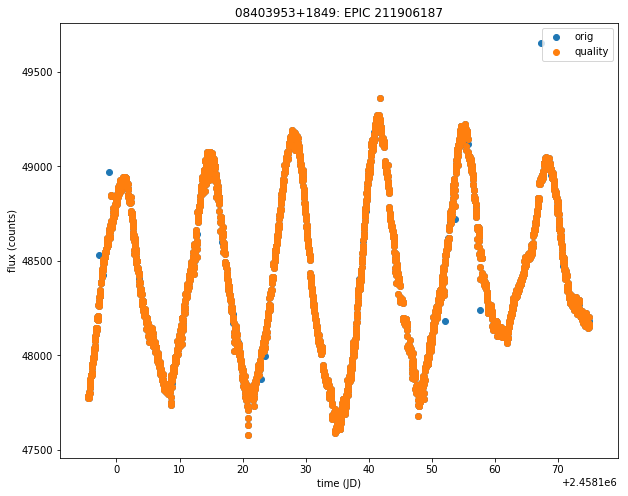

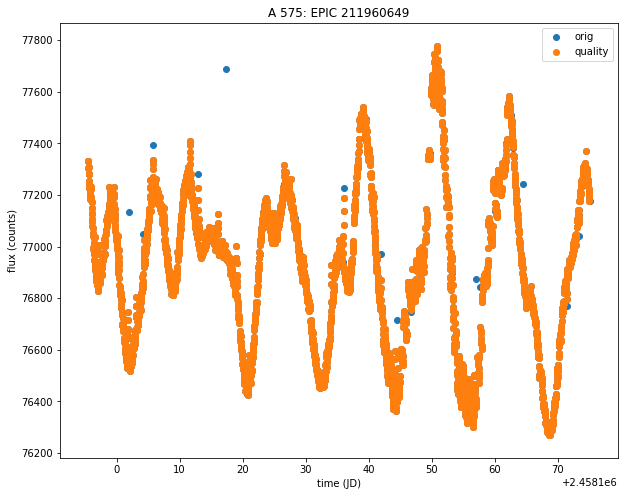

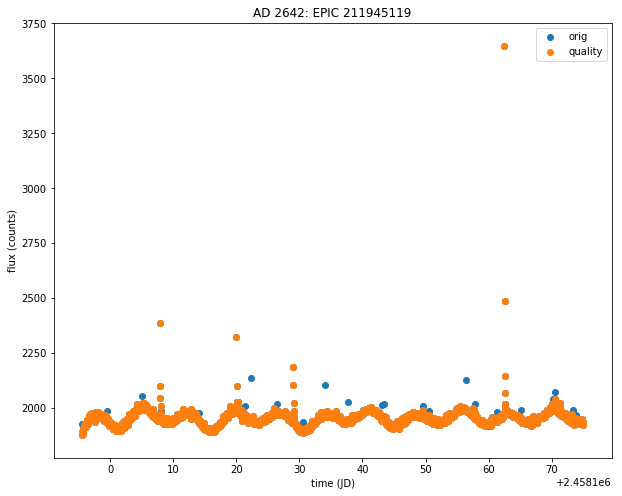

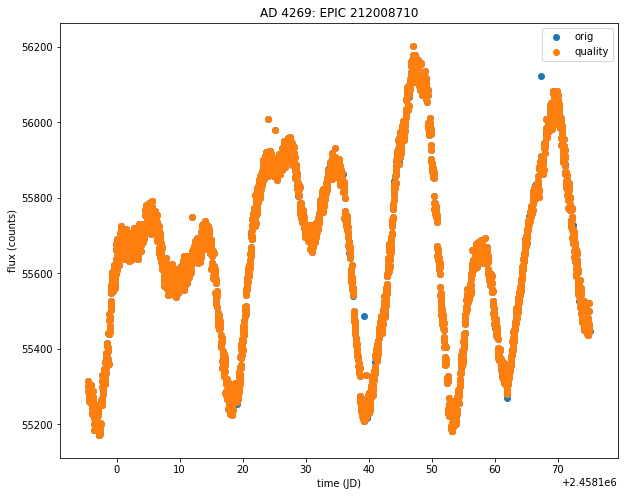

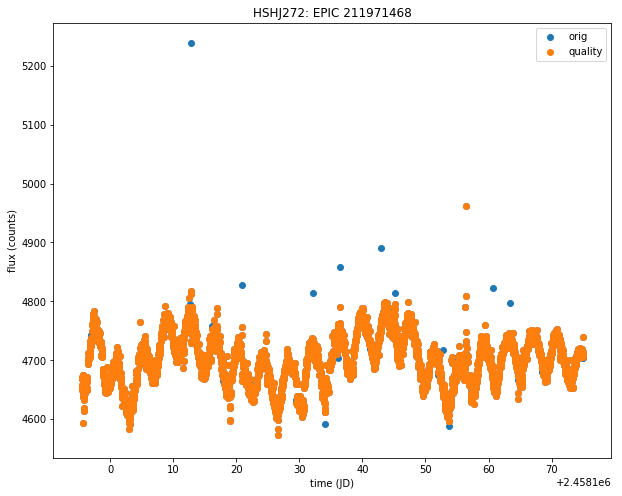

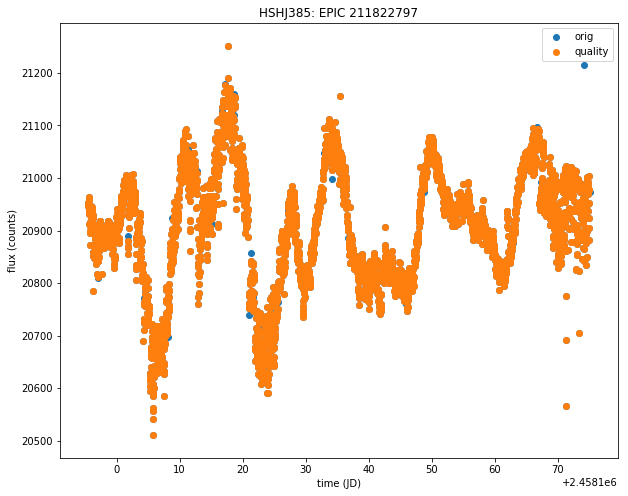

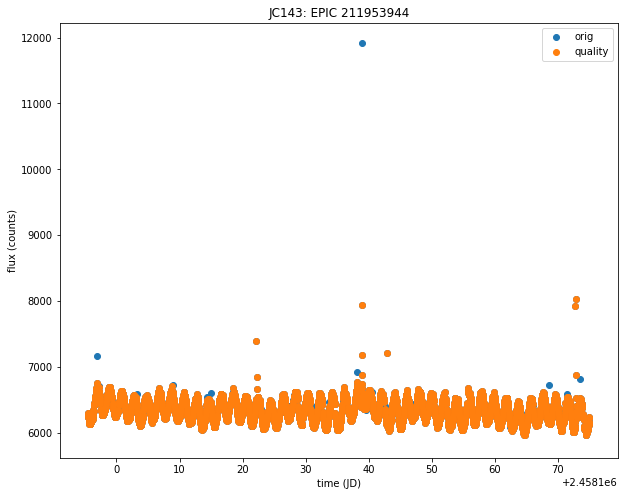

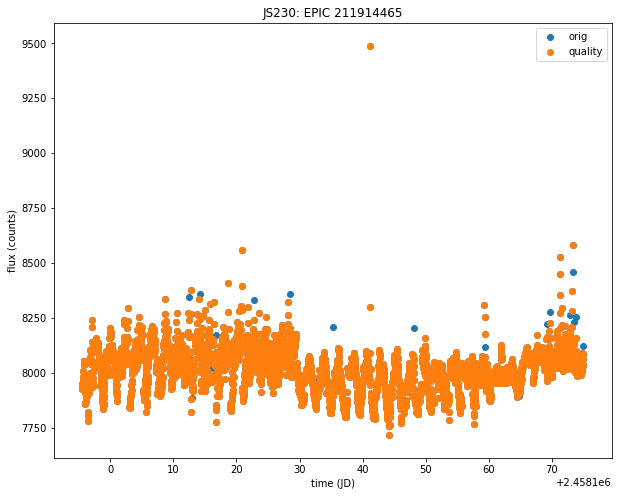

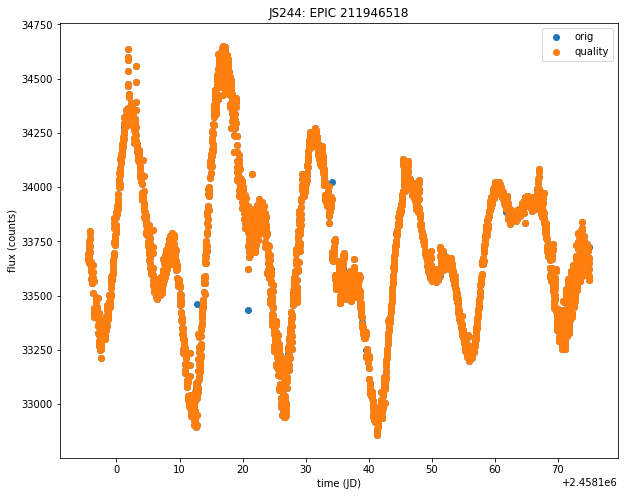

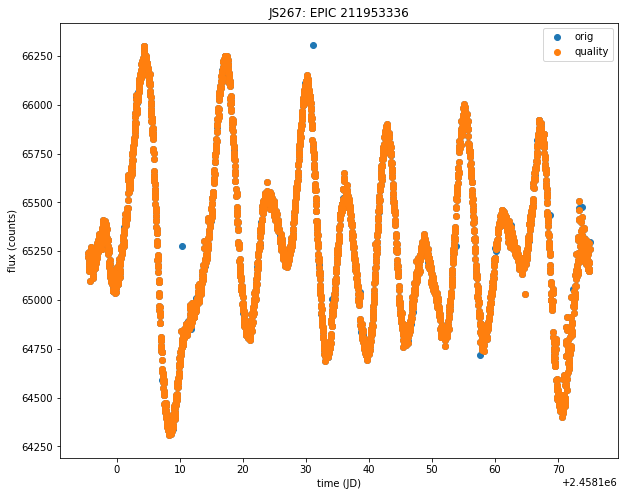

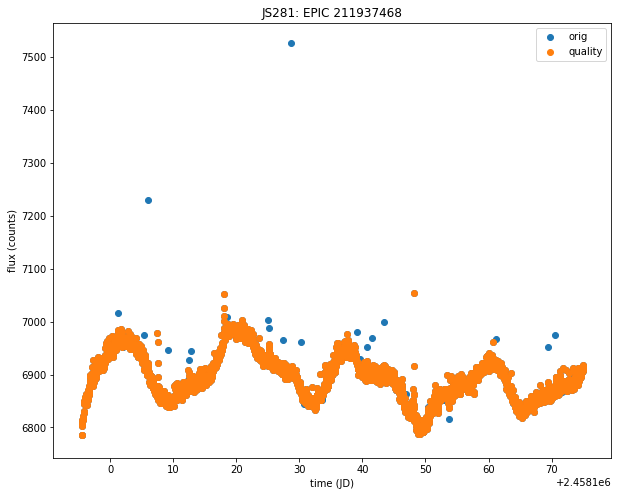

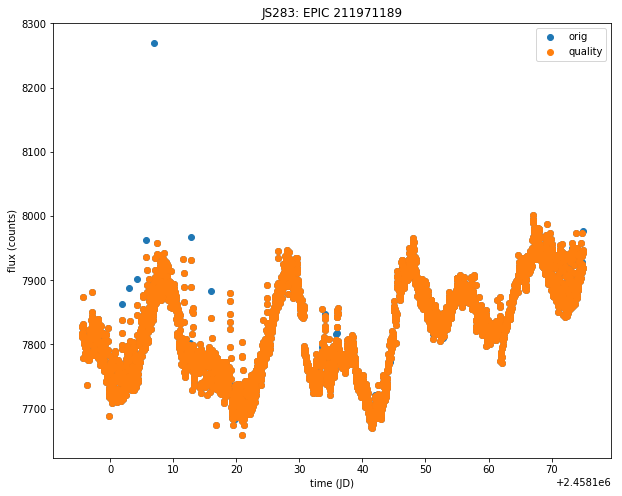

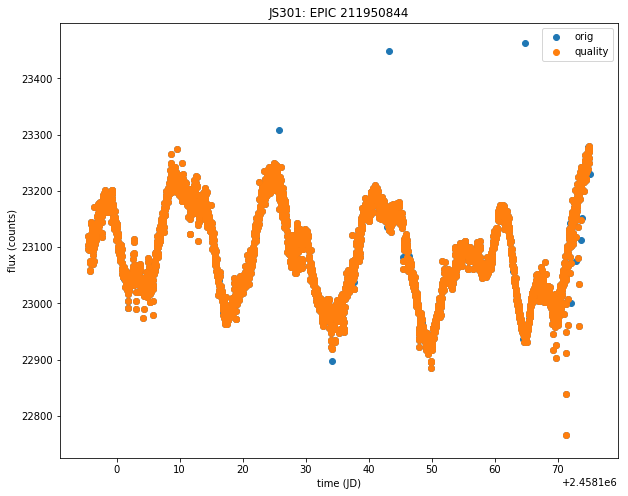

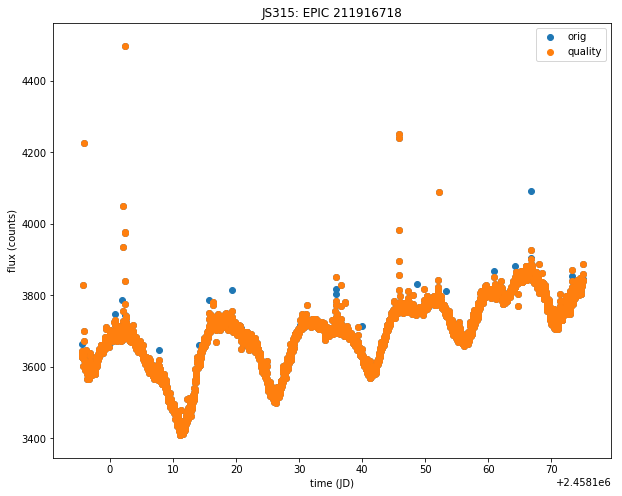

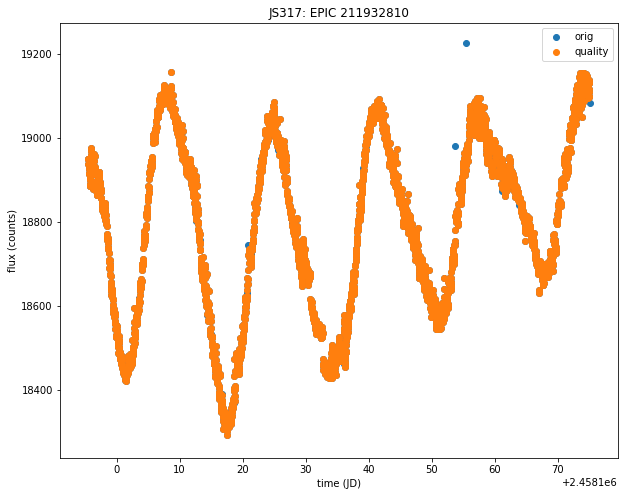

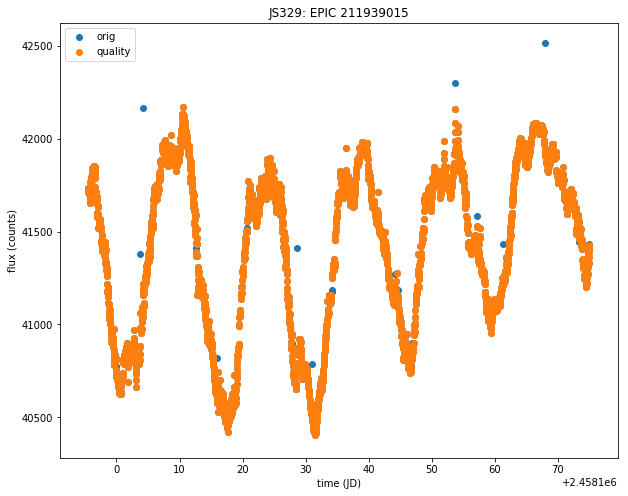

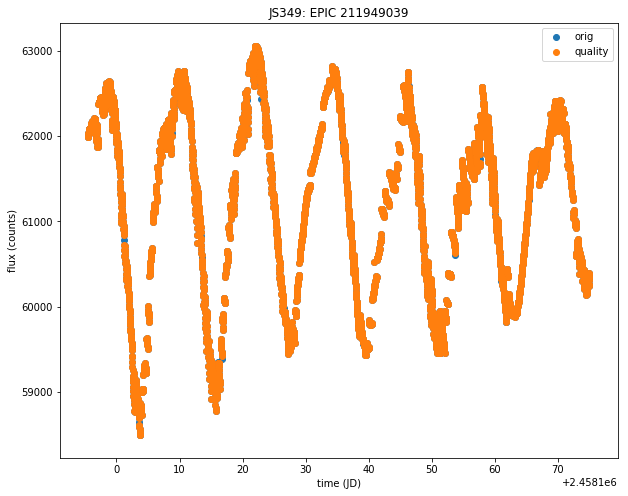

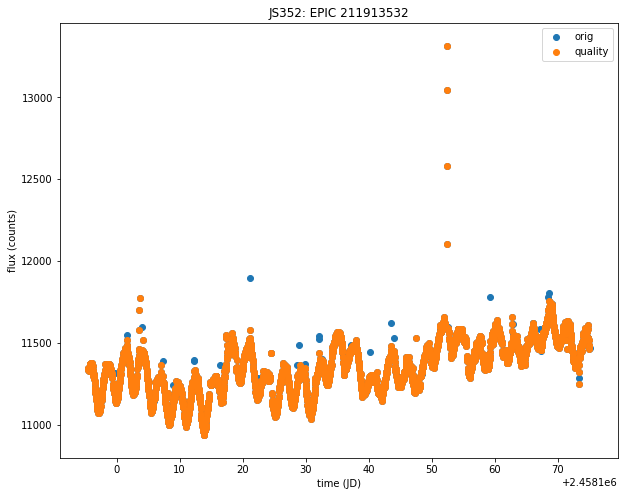

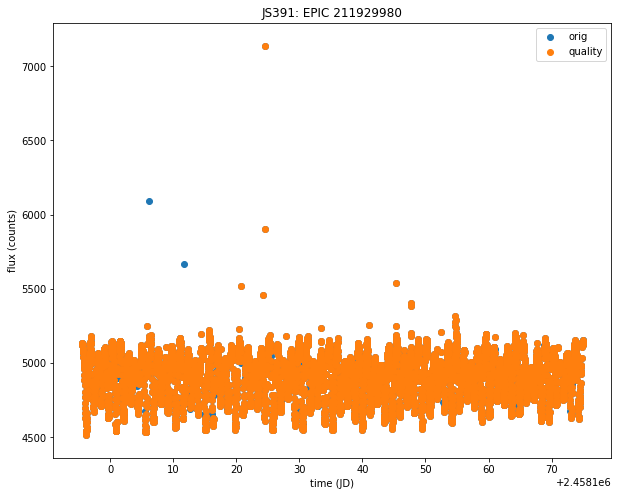

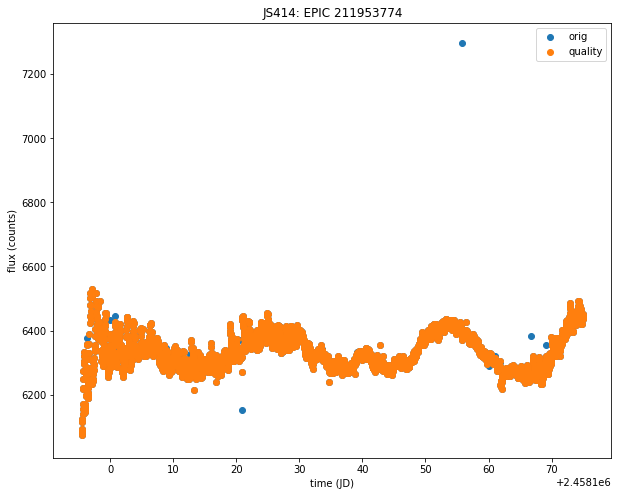

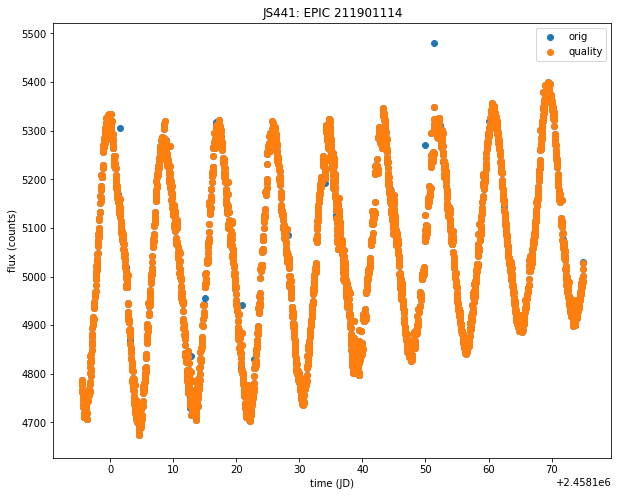

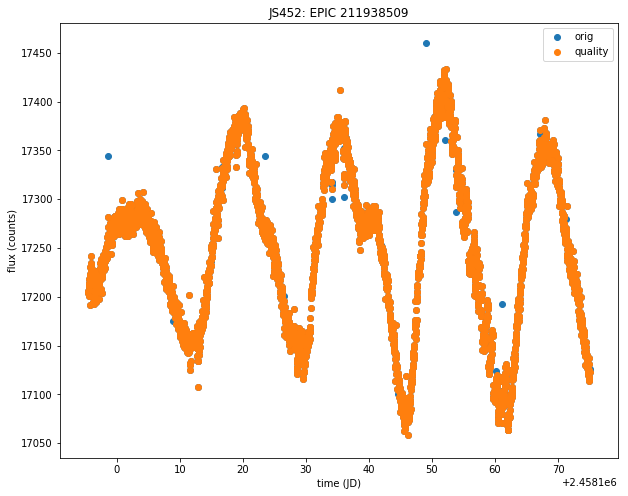

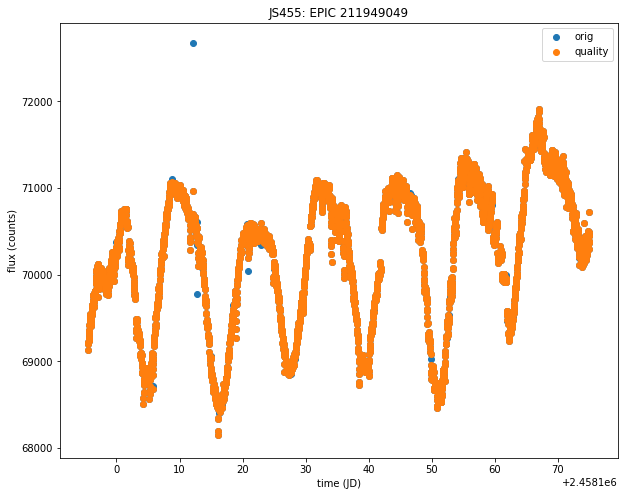

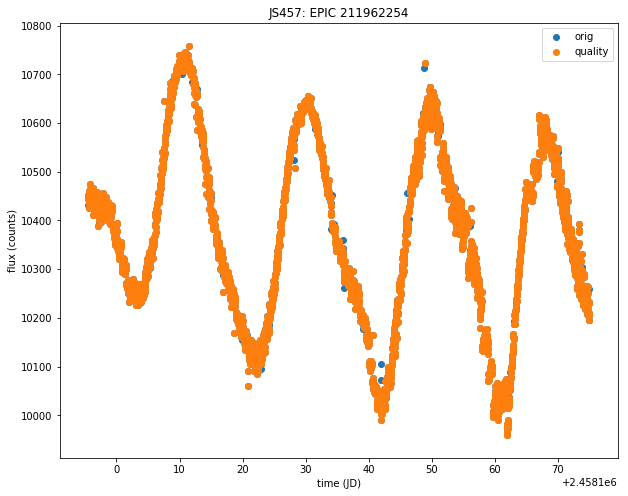

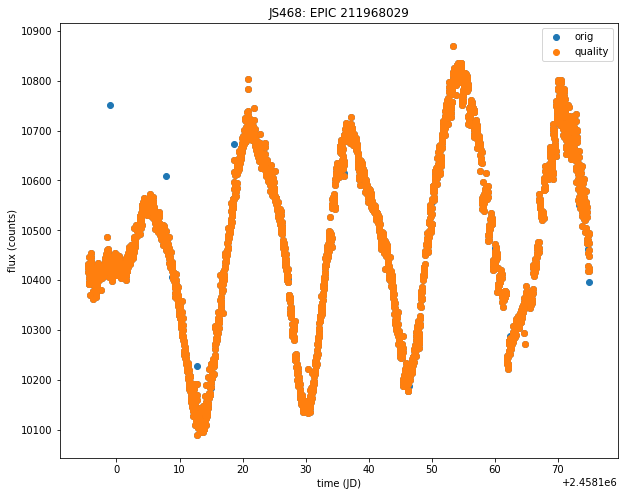

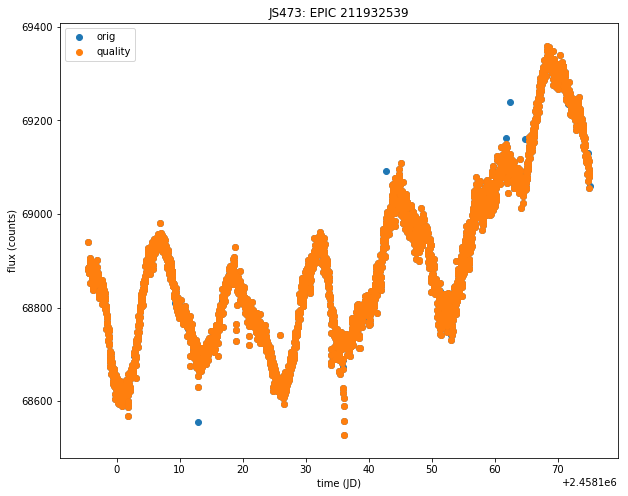

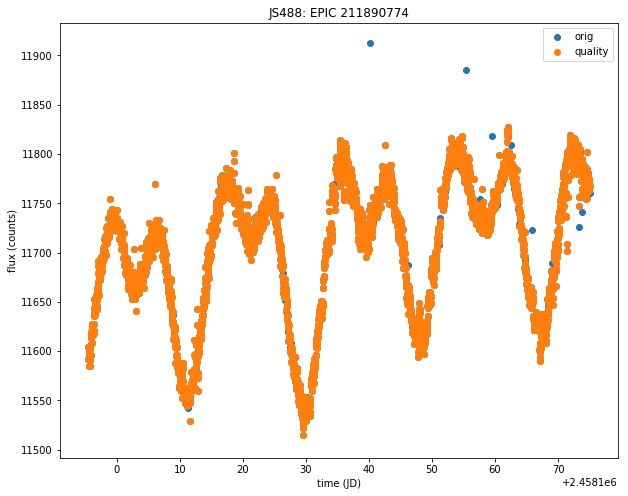

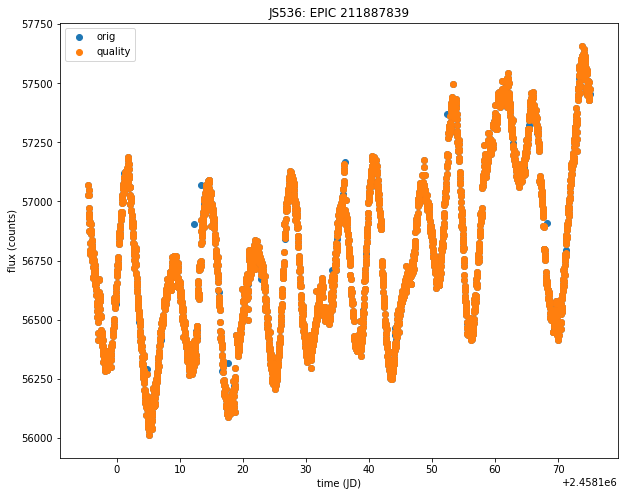

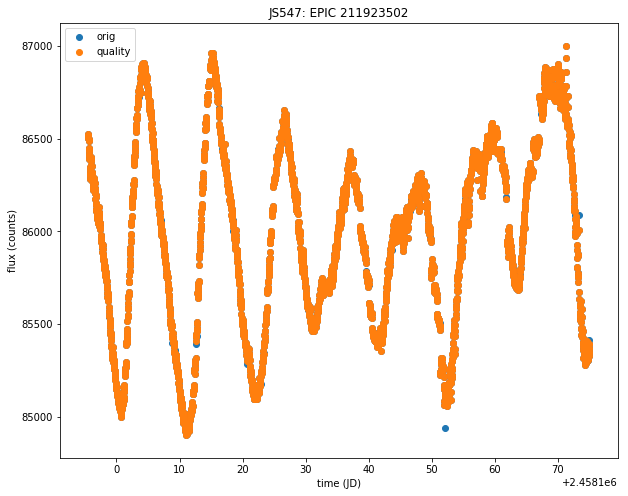

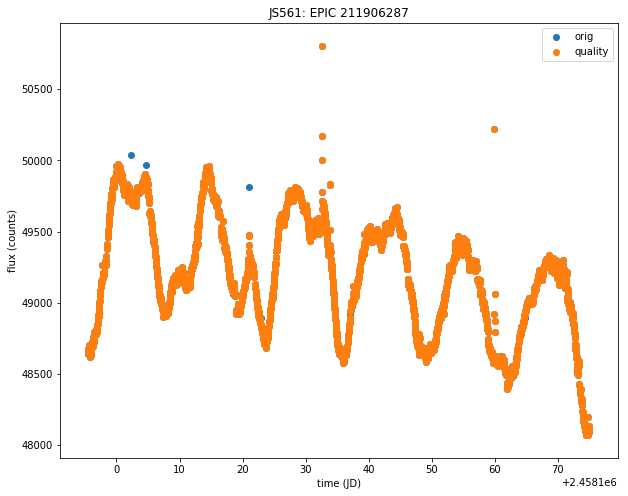

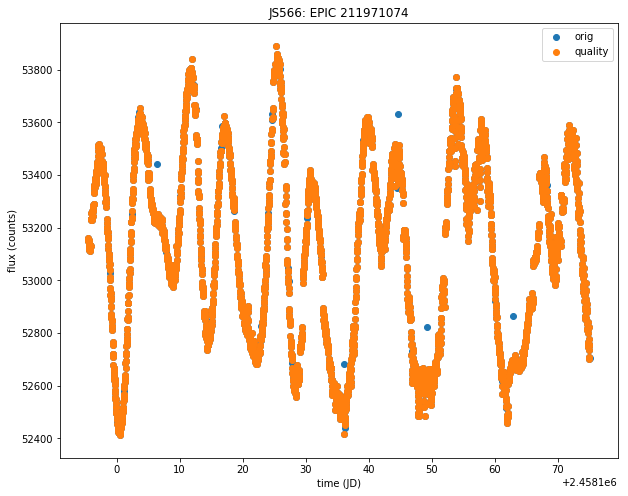

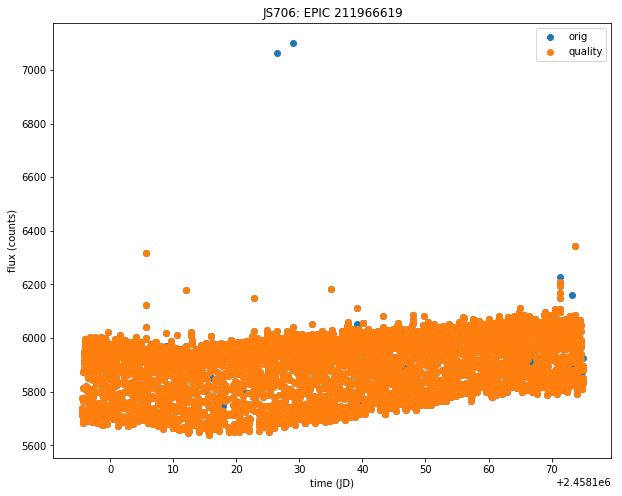

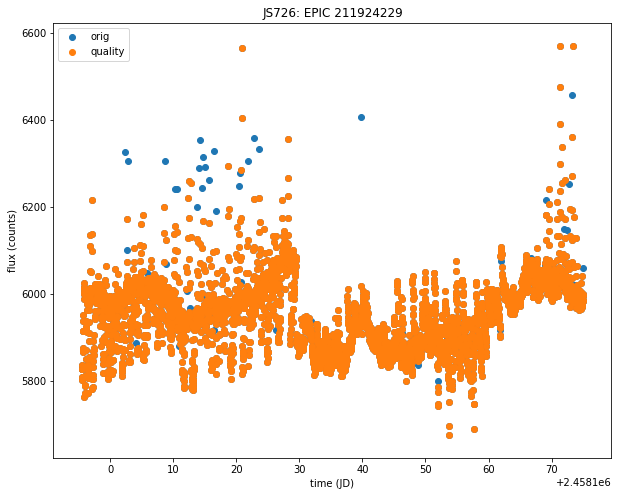

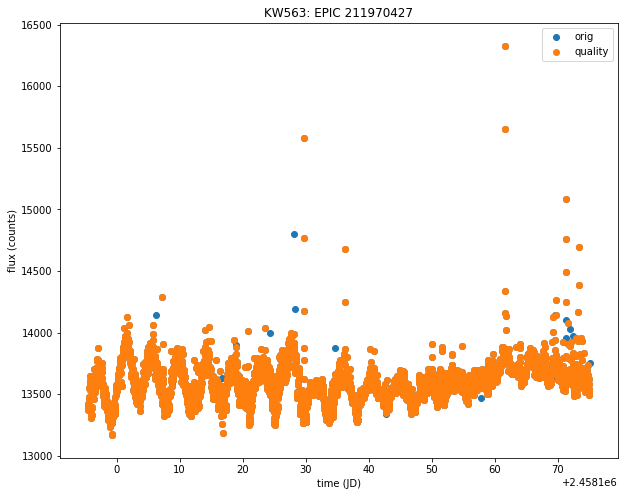

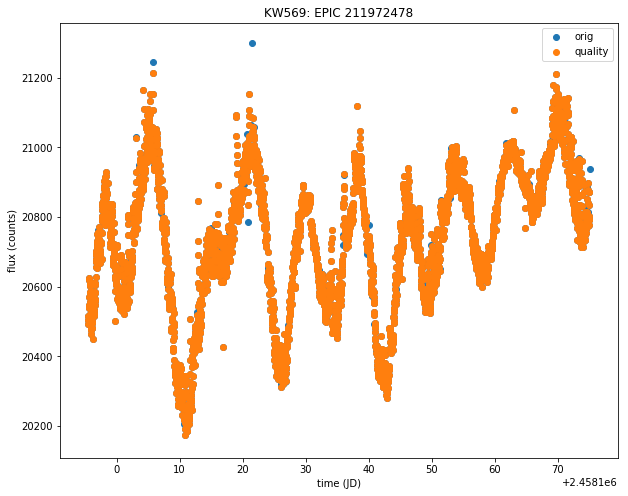

In [44]:
obs_tab =[]
import csv

with open('/Users/amandaash/Desktop/Research/observation_info/observation_table.csv', 'r') as csvFile:
    obs_data = csv.reader(csvFile)
    for row in obs_data:
        obs_tab.append(row)
csvFile.close()


ID = []

for n in obs_tab[1:]:
    ID.append(n[0:2])

target_ID = np.unique(np.array(ID),axis = 0)

import glob

files = glob.glob('/Users/amandaash/Desktop/Research/data/K2C16_Amanda/*.fits')
EPIC_ID = []
for file in files:
    ID = (file.split('/')[7]).split('_')[1]
    EPIC_ID.append(ID)

for target in target_ID:
    EPIC = target[1]
    if EPIC in EPIC_ID:
        index = EPIC_ID.index(EPIC)
        light_curve = files[index]
        time_orig,flux_orig = kep_io.k2sc_io(light_curve, False)
        time_quality,flux_quality = kep_io.k2sc_io(light_curve, True)
        plt.figure(figsize = [10,8])
        plt.scatter(time_orig + 2454833,flux_orig, label = 'orig')
        plt.scatter(np.array(time_quality) + 2454833, np.array(flux_quality), label = 'quality')
        plt.xlabel('time (JD)')
        plt.ylabel('flux (counts)')
        plt.legend()
        plt.title(target[0] + ': EPIC ' + str(EPIC))
        plt.savefig('/Users/amandaash/Desktop/Research/plots/lightcurve/quality/{0}_k2sc.pdf'.format(target[0]))
        plt.show()

In [47]:
from scipy import stats
obs_tab =[]
import csv

with open('/Users/amandaash/Desktop/Research/observation_info/observation_table.csv', 'r') as csvFile:
    obs_data = csv.reader(csvFile)
    for row in obs_data:
        obs_tab.append(row)
csvFile.close()

target_info = obs_tab[1:]

target_ID = []

for n in target_info:
    target_ID.append([n[0],n[1]])

target_list_ID = np.unique(np.array(target_ID),axis = 0)

files = glob.glob('/Users/amandaash/Desktop/Research/data/K2C16_Amanda/*.fits')
EPIC_ID = []
for file in files:
    ID = (file.split('/')[7]).split('_')[1]
    EPIC_ID.append(ID)

for n in target_list_ID:
    fig,(ax1, ax2) = plt.subplots(2,1)
    plt.rcParams['figure.figsize'] = [12, 10]
    ax1 = plt.subplot(211)
    ax2 = plt.subplot(212)
    
    
    JD_array_good = []
    EqW_array_good = []
    lower_error_array_good = []
    upper_error_array_good = []
    
    JD_array_suspect = []
    EqW_array_suspect = []
    lower_error_array_suspect = []
    upper_error_array_suspect = []
    
    JD_array_bad = []
    EqW_array_bad = []
    lower_error_array_bad = []
    upper_error_array_bad = []
    
    for row in target_info:
        if row[0] == n[0] and row[12] == str(0):
            EW16 = row[9]
            EW50 = row[10]
            EW84 = row[11]
            UTC_date = row[5]
            UTC_time = row[6]
            
            UTC = str(UTC_date)  + ' ' + str(UTC_time)
        
            
            UTC_time= Time(UTC, scale = 'utc')
    
            JD_time = UTC_time.jd
        
            JD_array_good.append(JD_time)
            
            EqW = float(EW50)
            perc16 = float(EW16)
            perc84 = float(EW84)
            lower_uncertainty = EqW - perc16
            lower_error_array_good.append(lower_uncertainty)
            upper_uncertainty = perc84 - EqW
            upper_error_array_good.append(upper_uncertainty)
            EqW_array_good.append(EqW)
            
        if row[0] == n[0] and row[12] == str(1):
            EW16 = row[9]
            EW50 = row[10]
            EW84 = row[11]
            UTC_date = row[5]
            UTC_time = row[6]
            
            UTC = str(UTC_date)  + ' ' + str(UTC_time)
        
            
            UTC_time= Time(UTC, scale = 'utc')
    
            JD_time = UTC_time.jd
        
            JD_array_suspect.append(JD_time)
            
            EqW = float(EW50)
            perc16 = float(EW16)
            perc84 = float(EW84)
            lower_uncertainty = EqW - perc16
            lower_error_array_suspect.append(lower_uncertainty)
            upper_uncertainty = perc84 - EqW
            upper_error_array_suspect.append(upper_uncertainty)
            EqW_array_suspect.append(EqW)
        
        if row[0] == n[0] and row[12] == str(2):
            EW16 = row[9]
            EW50 = row[10]
            EW84 = row[11]
            UTC_date = row[5]
            UTC_time = row[6]
            
            UTC = str(UTC_date)  + ' ' + str(UTC_time)
        
            
            UTC_time= Time(UTC, scale = 'utc')
    
            JD_time = UTC_time.jd
        
            JD_array_bad.append(JD_time)
            
            EqW = float(EW50)
            perc16 = float(EW16)
            perc84 = float(EW84)
            lower_uncertainty = EqW - perc16
            lower_error_array_bad.append(lower_uncertainty)
            upper_uncertainty = perc84 - EqW
            upper_error_array_bad.append(upper_uncertainty)
            EqW_array_bad.append(EqW)
        
        else:
            continue
        
       
    
    #print(len(EqW_array))
    v_good = [lower_error_array_good, upper_error_array_good]
    v_suspect = [lower_error_array_suspect, upper_error_array_suspect]
    v_bad = [lower_error_array_bad, upper_error_array_bad]
    
    okay_EW = list(EqW_array_good) + list(EqW_array_suspect)
    okay_JD = list(JD_array_good) + list(JD_array_suspect)
    
    
    
    all_JD = list(JD_array_good) + list(JD_array_suspect) + list(JD_array_bad)

    
    ax1.errorbar(JD_array_good,EqW_array_good, yerr = v_good, fmt = 'o', color = 'b', label = 'quality flag = 0')
    ax1.errorbar(JD_array_suspect,EqW_array_suspect, yerr = v_suspect, fmt = 'o', color = 'y', label = 'quality flag = 1')
    ax1.errorbar(JD_array_bad,EqW_array_bad, yerr = v_bad, fmt = 'o', color = 'r', label = 'quality flag = 2')
    ax1.set_ylim(np.max(okay_EW) + 3*np.std(okay_EW), np.min(okay_EW)-3*np.std(okay_EW))
    ax1.set_xlim(np.min(okay_JD)-1, np.max(okay_JD)+1)
    ax2.set_xlim(np.min(okay_JD)-1, np.max(okay_JD)+1)
    ax1.set_title(n[0] + ' EPIC ID: ' + n[1], fontsize = 30)
    ax1.set_ylabel(r'$H_{\alpha}\ EW\ (\AA)$', fontsize = 26, labelpad = 24)
    #ax1.set_xlabel('time (days)', fontsize = 26, labelpad = 24)
    ax1.tick_params(labelsize = 24)
    ax1.legend()
    

    EPIC = n[1]
    if EPIC in EPIC_ID:
        index = EPIC_ID.index(EPIC)
        light_curve = files[index]
        time,flux = kep_io.k2sc_io(light_curve, True)
        ax2.set_ylim(np.median(flux) - 3*np.std(flux), np.median(flux) + 3*np.std(flux))
        ax2.scatter(np.array(time) + 2454833,flux)
        #ax2.set_xlabel('time')
        ax2.vlines(x = all_JD, ymin = np.median(flux) - 3*np.std(flux), ymax = np.median(flux) + 3*np.std(flux), linestyle = 'dashed')
        ax2.tick_params(labelsize = 24)
        ax2.set_ylabel('Flux (counts)', fontsize = 26, labelpad = 24)
        #ax2.set_title(n[0] + ': EPIC ' + str(EPIC) )
        
    plt.xlabel('time (JD)', fontsize = 26)
    plt.tight_layout()
    plt.savefig('/Users/amandaash/Desktop/Research/plots/EW_lightcurve/quality_flag/{0}.pdf'.format(n[0]))
    plt.close()
    
    #we need to get the flux for the corresponding EW measurement using JD:
    
    light_curve_days_good = []
    light_curve_days_suspect = []
    light_curve_days_bad = []
    
    for day in JD_array_good:
        JD_time = np.abs((np.array(time) + 2454833) - day)
        corr_index = np.where(JD_time == np.min(JD_time))
        light_curve_days_good.append(corr_index[0][0])
    
    for day in JD_array_suspect:
        JD_time = np.abs((np.array(time) + 2454833) - day)
        corr_index = np.where(JD_time == np.min(JD_time))
        light_curve_days_suspect.append(corr_index[0][0])
    
    for day in JD_array_bad:
        JD_time = np.abs((np.array(time) + 2454833) - day)
        corr_index = np.where(JD_time == np.min(JD_time))
        light_curve_days_bad.append(corr_index[0][0])
    
    corr_flux_good = []
    corr_flux_suspect = []
    corr_flux_bad = []
    
    for y in light_curve_days_good:
        corr_flux_good.append(flux[y])
    for y in light_curve_days_suspect:
        corr_flux_suspect.append(flux[y])
    for y in light_curve_days_bad:
        corr_flux_bad.append(flux[y])
    
    
    slope1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(list(corr_flux_good) + list(corr_flux_suspect) ,list(EqW_array_good) + list(EqW_array_suspect))
    line1 = slope1*np.array(list(corr_flux_good) + list(corr_flux_suspect)) + intercept1
    slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(list(corr_flux_good),list(EqW_array_good))
    line2 = slope2*np.array(list(corr_flux_good)) + intercept2
    corr_fig = plt.figure(figsize = [14,10])
    plt.errorbar(corr_flux_good, EqW_array_good, yerr = v_good, fmt = 'o', color = 'b', label = 'quality flag = 0')
    plt.errorbar(corr_flux_suspect, EqW_array_suspect, yerr = v_suspect, fmt = 'o', color = 'y', label = 'quality flag = 1')
    plt.errorbar(corr_flux_bad, EqW_array_bad, yerr = v_bad, fmt = 'o', color = 'r', label = 'quality flag = 2')
    plt.plot(list(corr_flux_good) + list(corr_flux_suspect),line1, linestyle = 'dashed', color = 'k', label = 'linear correlation, quality flag = 0,1', linewidth = 3)
    plt.plot(list(corr_flux_good),line2, linestyle = 'dotted', color = 'grey', label = 'linear correlation, quality flag = 0', linewidth = 3)
    plt.ylim(np.max(okay_EW) + 3*np.std(okay_EW), np.min(okay_EW) - 3*np.std(okay_EW))
    plt.xlim(np.min(list(corr_flux_good) + list(corr_flux_suspect))-0.5*np.std(list(corr_flux_good) + list(corr_flux_suspect)), np.max(list(corr_flux_good) + list(corr_flux_suspect))+0.5*np.std(list(corr_flux_good) + list(corr_flux_suspect)))
    plt.xlim()
    plt.title(n[0] + ' EPIC ID: ' + n[1], fontsize = 30)
    plt.tick_params(labelsize = 24)
    plt.xlabel('flux (counts)', fontsize = 26, labelpad = 24)
    plt.ylabel(r'$H_{\alpha}\ EW\ (\AA)$', fontsize = 26, labelpad = 24)
    plt.legend()
    corr_fig.savefig('/Users/amandaash/Desktop/Research/plots/EW_flux_corr/quality_flag/{0}.pdf'.format(n[0]))
    plt.close()